In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# fill_between(x, y1, y2)

See `~matplotlib.axes.Axes.fill_between`.


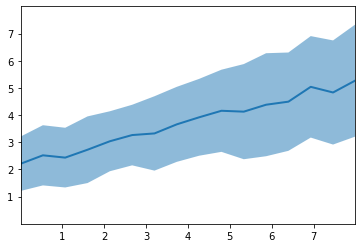

In [3]:
# plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = np.linspace(0, 8, 16)
y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))

# plot
fig, ax = plt.subplots()

ax.fill_between(x, y1, y2, alpha=.5, linewidth=0)
ax.plot(x, (y1 + y2)/2, linewidth=2)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

##### N with Nhat

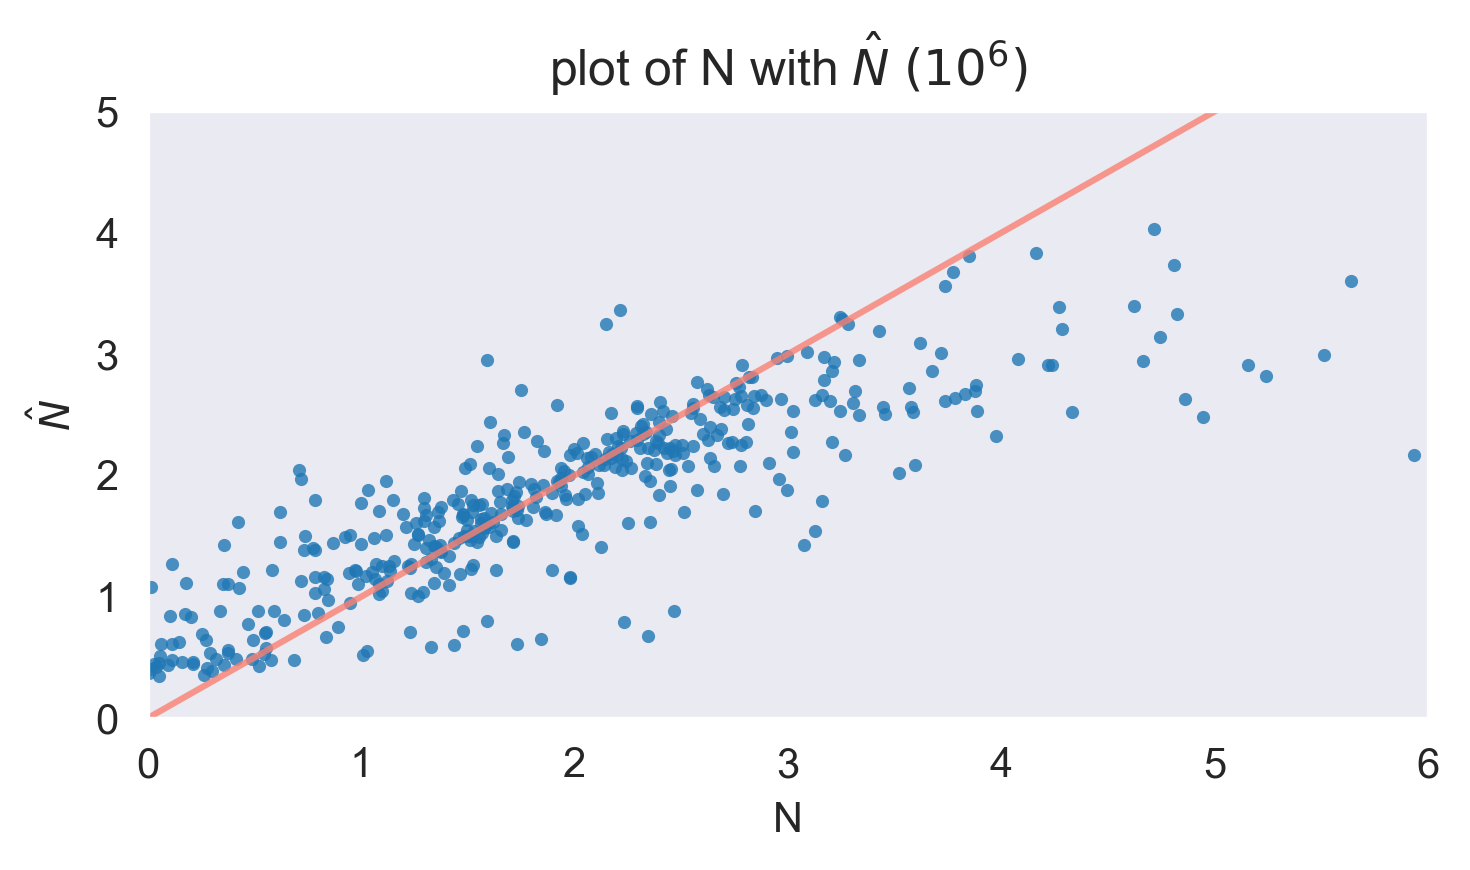

In [2]:
path = 'N_Nhat.csv'
N_Nhat = pd.read_csv(path)
x = N_Nhat['N'].values
y = N_Nhat['Nhat'].values

plt.figure(dpi=300, figsize=(5, 3))
plt.scatter(x, y, s = 10, alpha=.8, linewidths=0)
plt.plot([0,7], [0,7], color="salmon", alpha=.8)
plt.xlim([0,6])
plt.ylim([0,5])
plt.title('plot of N with '+ r'$\hat N$ ' + r'$(10^6)$')
plt.xlabel('N')  # x轴标题
plt.ylabel(r'$\hat N$')  # y轴标题
plt.grid(ls='-.')  # 绘制背景线
plt.tight_layout()
plt.savefig('fig/Nhat with N.png')
plt.show()

In [6]:
np.corrcoef(x,y)

array([[1.        , 0.84161312],
       [0.84161312, 1.        ]])

##### Nhat_sum with sample rate

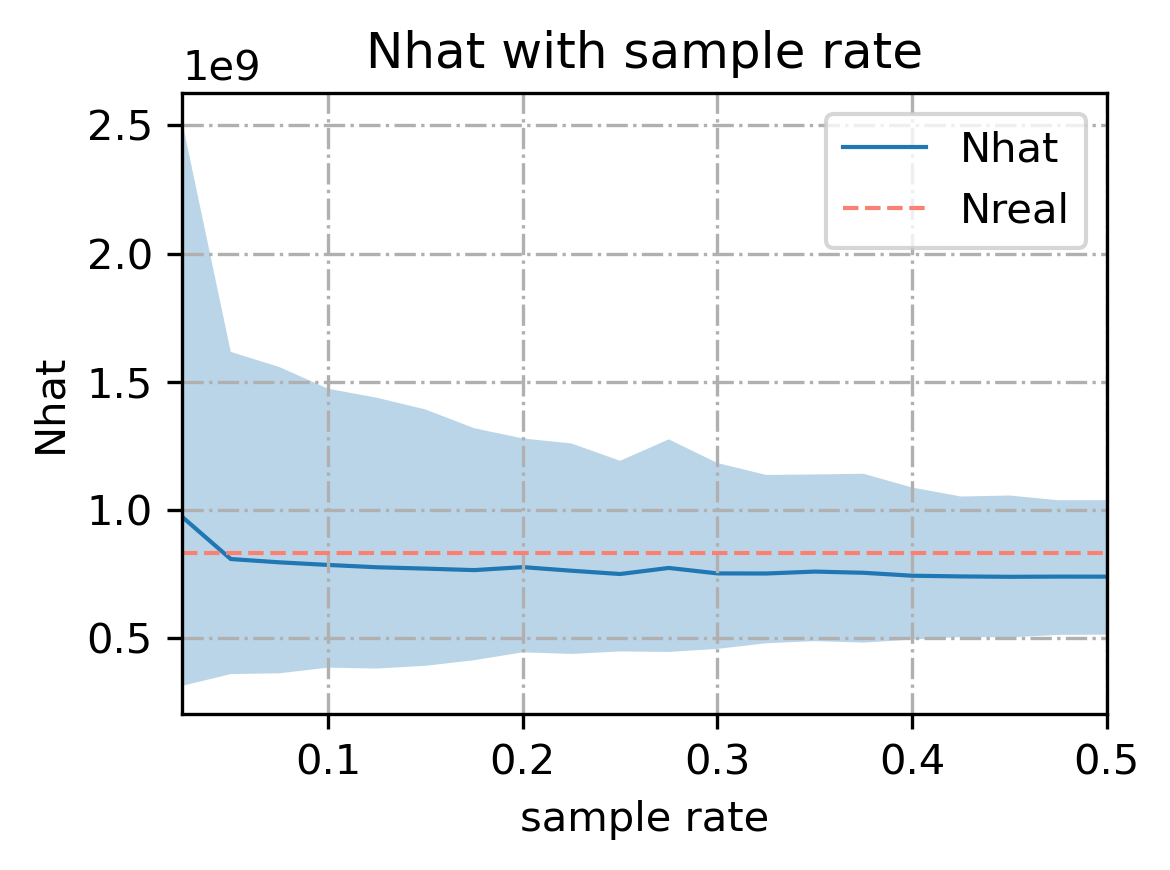

In [25]:
N_sum_real = 832533410.96
path = 'Nhat_samplerate.csv'
Nhat_samplerate = pd.read_csv(path)
# fig, ax = plt.subplots()

plt.figure(dpi=300, figsize=(4, 3))
plt.fill_between(Nhat_samplerate['sample_rate'].values, Nhat_samplerate['sum_N_upper2'].values, Nhat_samplerate['sum_N_lower2'].values, alpha=.3, linewidth=0, zorder=0)
plt.hlines(N_sum_real, Nhat_samplerate['sample_rate'][0], Nhat_samplerate['sample_rate'][19], color='salmon', lw=1, label='Nreal', zorder=2, ls='--')
plt.plot(Nhat_samplerate['sample_rate'].values, Nhat_samplerate['sum_N_hat'].values, linewidth=1, label='Nhat', zorder=1)

plt.xlim([Nhat_samplerate['sample_rate'][0],0.5])
plt.title('Nhat with sample rate')
plt.xlabel('sample rate')  # x轴标题
plt.ylabel('Nhat')  # y轴标题
plt.grid(ls='-.')  # 绘制背景线
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('fig/Nhat with sample rate.png')
plt.show()

##### Nhat with village number

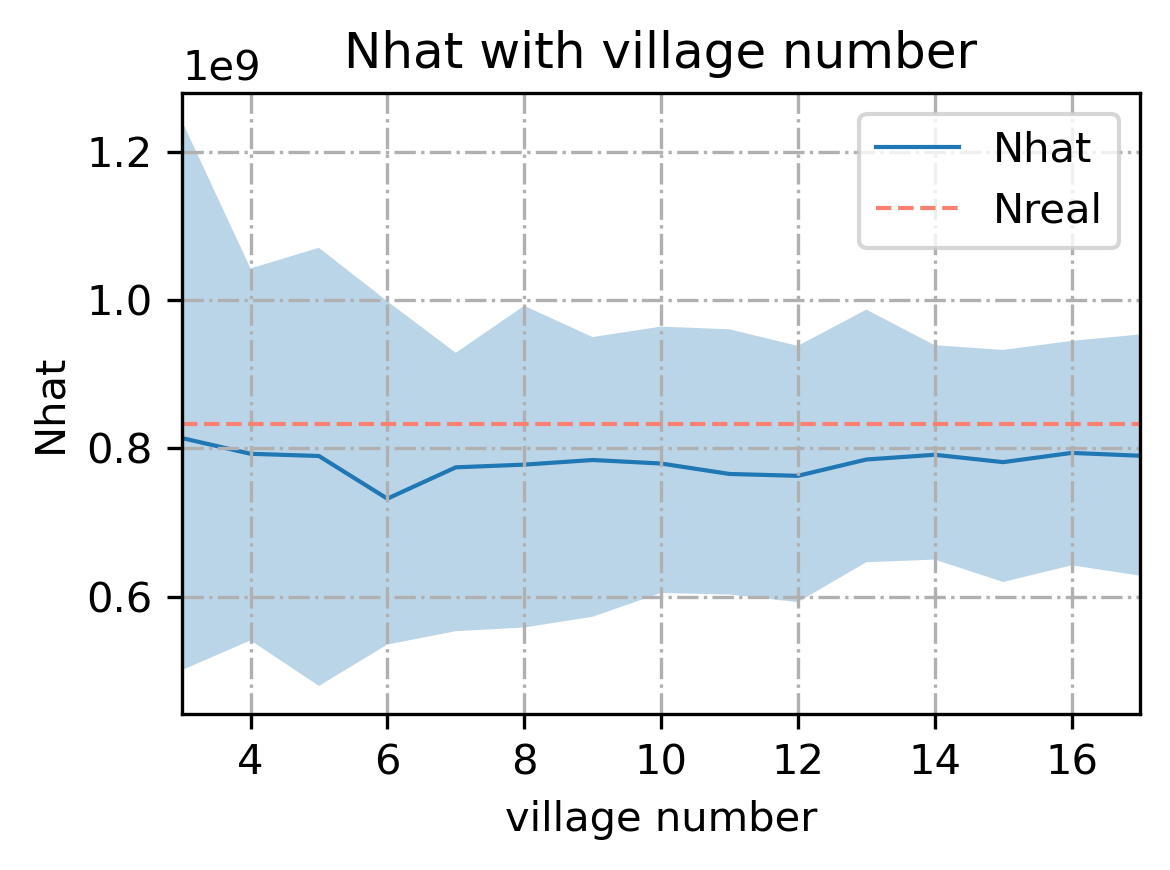

In [22]:
N_sum_real = 832533410.96
path = 'Nhat_villnum.csv'
Nhat_villnum = pd.read_csv(path)
# fig, ax = plt.subplots()
x = Nhat_villnum['num_town_samp'].values
yu = Nhat_villnum['b_sum_N_upper2'].values
yl = Nhat_villnum['b_sum_N_lower2'].values
yh = Nhat_villnum['b_sum_N_hat'].values

plt.figure(dpi=300, figsize=(4, 3))
plt.fill_between(x, yu, yl, alpha=.3, lw=0, zorder=0)
plt.hlines(N_sum_real, x[0], x[-1], color='salmon', lw=1, label='Nreal', zorder=2, ls='--')
plt.plot(x, yh, lw=1, label='Nhat', zorder=1)

plt.xlim([x[0], x[-1]])
plt.title('Nhat with village number')
plt.xlabel('village number')  # x轴标题
plt.ylabel('Nhat')  # y轴标题
plt.grid(ls='-.')  # 绘制背景线
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('fig/Nhat with village number.png')
plt.show()

##### 参数收敛过程

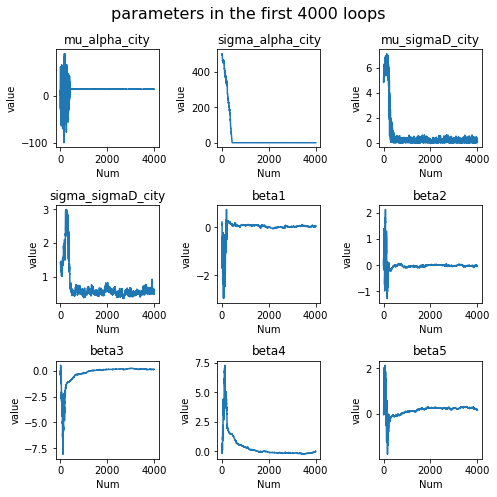

In [35]:
path = 'para.csv'
para = pd.read_csv(path).values
paralist = ['mu_alpha_city', 'sigma_alpha_city', 'mu_sigmaD_city', 'sigma_sigmaD_city', 'beta1', 'beta2', 'beta3', 'beta4', 'beta5']
x = np.linspace(start=1,stop=4000,num=4000)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(7, 7))
for i in range(3):
    for j in range(3):
        axs[i, j].set_title(paralist[3*i+j])
        axs[i, j].plot(x, para[:,3*i+j+1], color='C0')
        axs[i, j].set_xlabel("Num")
        axs[i, j].set_ylabel("value")

fig.suptitle('parameters in the first 4000 loops', fontsize=16)
fig.tight_layout()
plt.savefig('fig/parameters in the first 4000 loops.png')
plt.show()

##### 计算不同层级 $\alpha$ 的分布

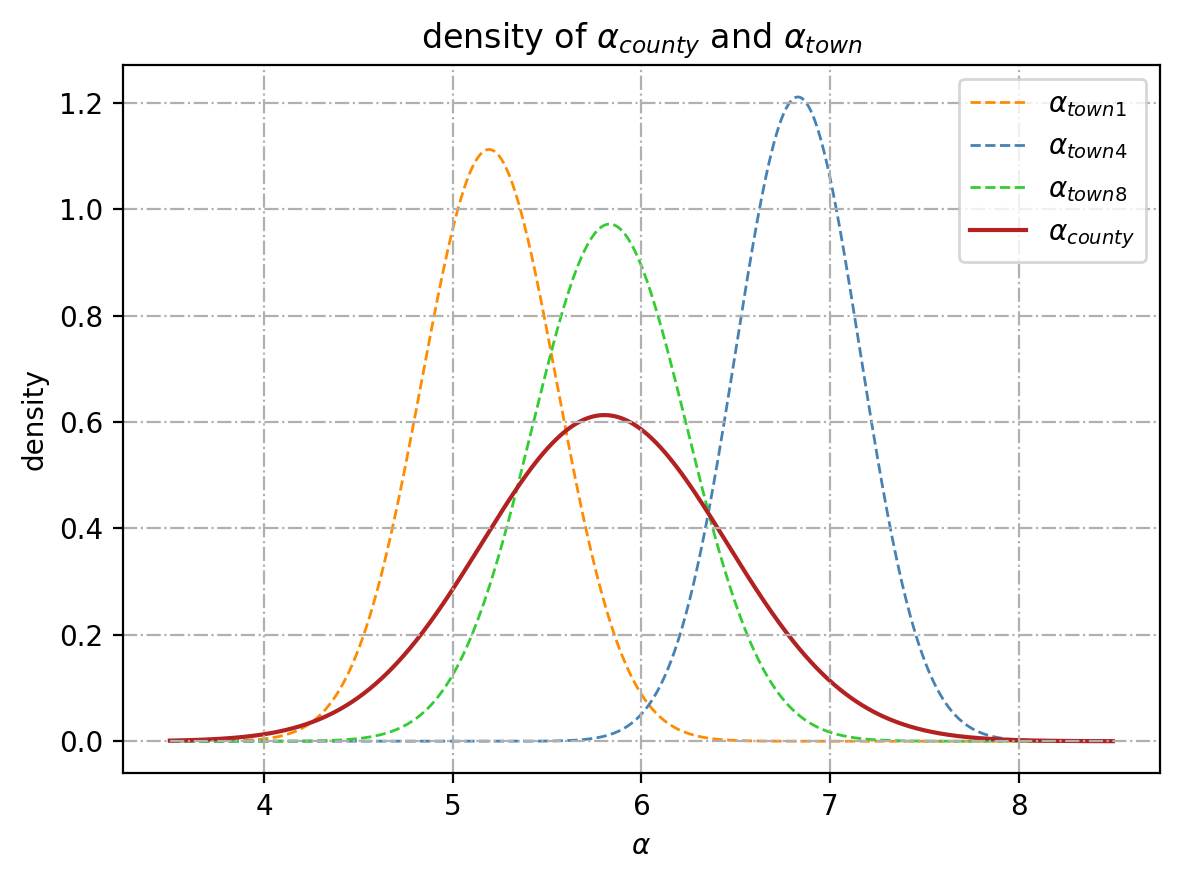

In [27]:
import seaborn as sb
def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf

path = 'summaries.csv'
summaries = pd.read_csv(path).values
path = 'Nhat_summary.csv'
Nhat_summary = pd.read_csv(path).values

path = 'Nhat_sample_pace.csv'
Nhat_sample_pace = pd.read_csv(path).values

x = np.linspace(start=3.5,stop=8.5,num=1000)
yc = normfun(x, summaries[0,2], summaries[1,2])
yt1 = normfun(x, summaries[2,2], summaries[19,2])
yt4 = normfun(x, summaries[5,2], summaries[22,2])
yt8 = normfun(x, summaries[9,2], summaries[27,2])

plt.figure(dpi=200, figsize=(6, 4.5))

plt.plot(x, yt1, lw=1, label=r'$\alpha_{town  1}$', zorder=1, color='darkorange', ls='--')
plt.plot(x, yt4, lw=1, label=r'$\alpha_{town  4}$', zorder=1, color='steelblue', ls='--')
plt.plot(x, yt8, lw=1, label=r'$\alpha_{town  8}$', zorder=1, color='limegreen', ls='--')
plt.plot(x, yc, lw=1.5, label=r'$\alpha_{county}$', zorder=1, color='firebrick')

plt.title('density of ' + r'$\alpha_{county}$' + ' and ' + r'$\alpha_{town}$')
plt.xlabel(r'$\alpha$')  # x轴标题
plt.ylabel('density')  # y轴标题
plt.grid(ls='-.')  # 绘制背景线
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('fig/density of alpha')
plt.show()